In [1]:
%config Completer.use_jedi = False
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from RobotDynamic import *

<IPython.core.display.Javascript object>


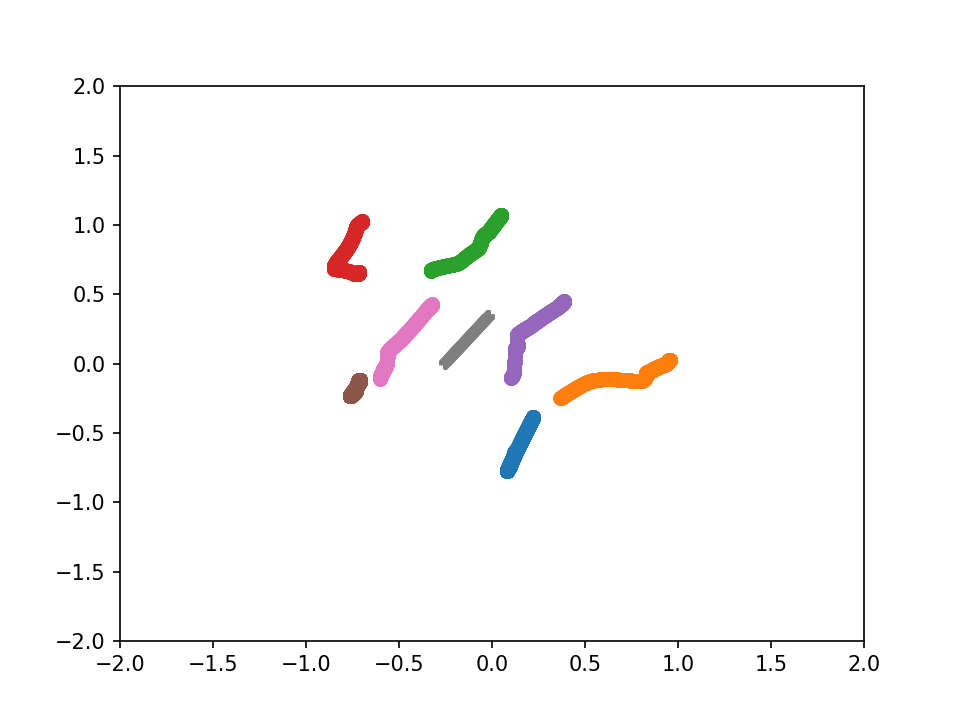

<IPython.core.display.Javascript object>


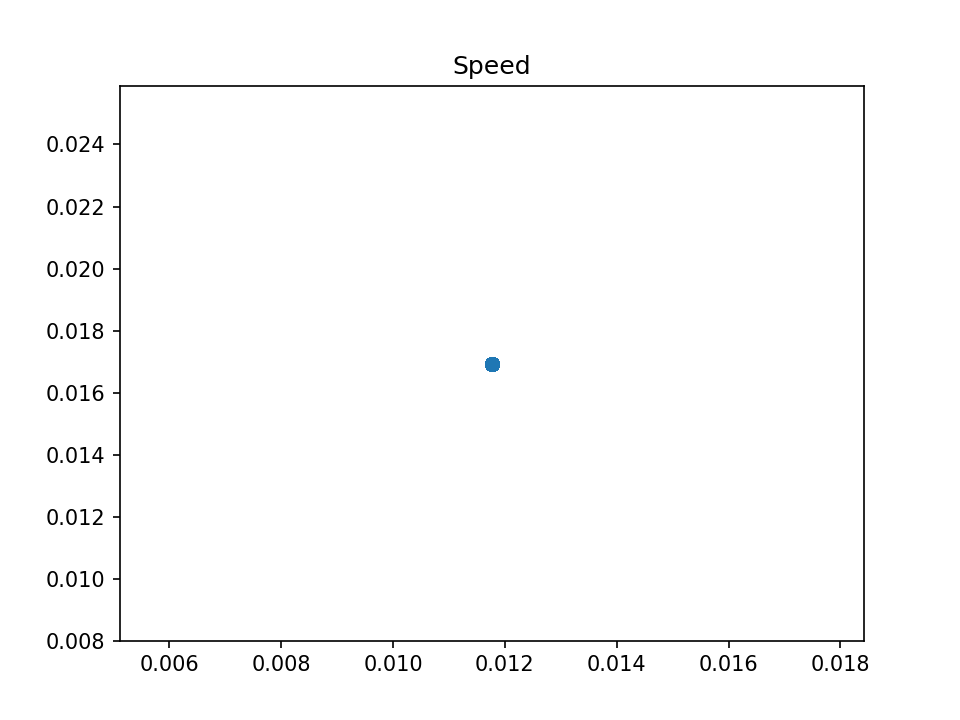

<IPython.core.display.Javascript object>


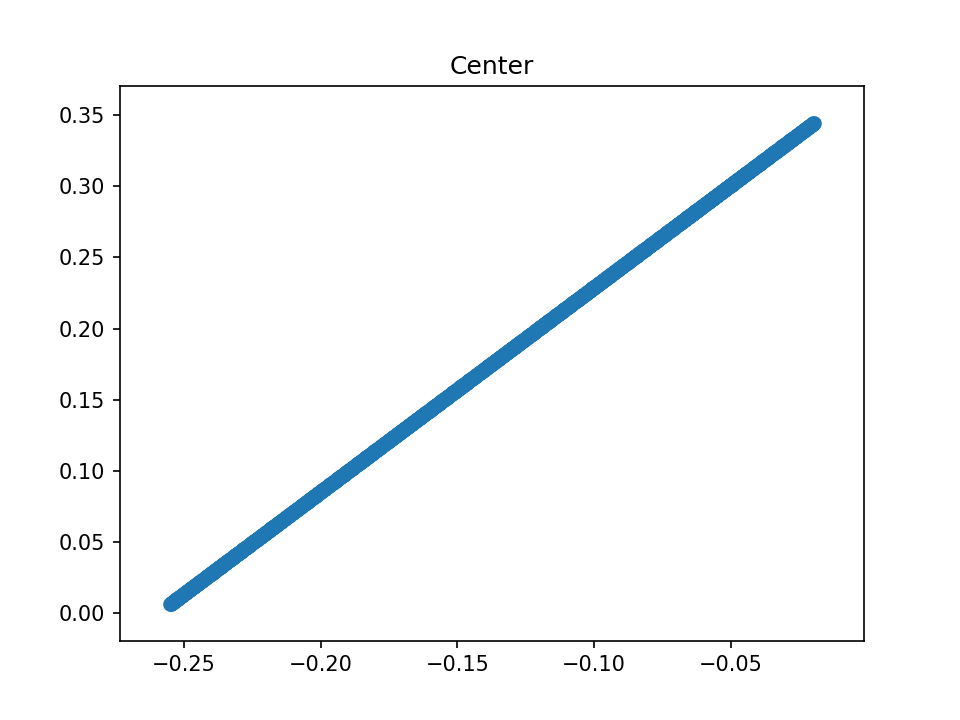

<IPython.core.display.Javascript object>


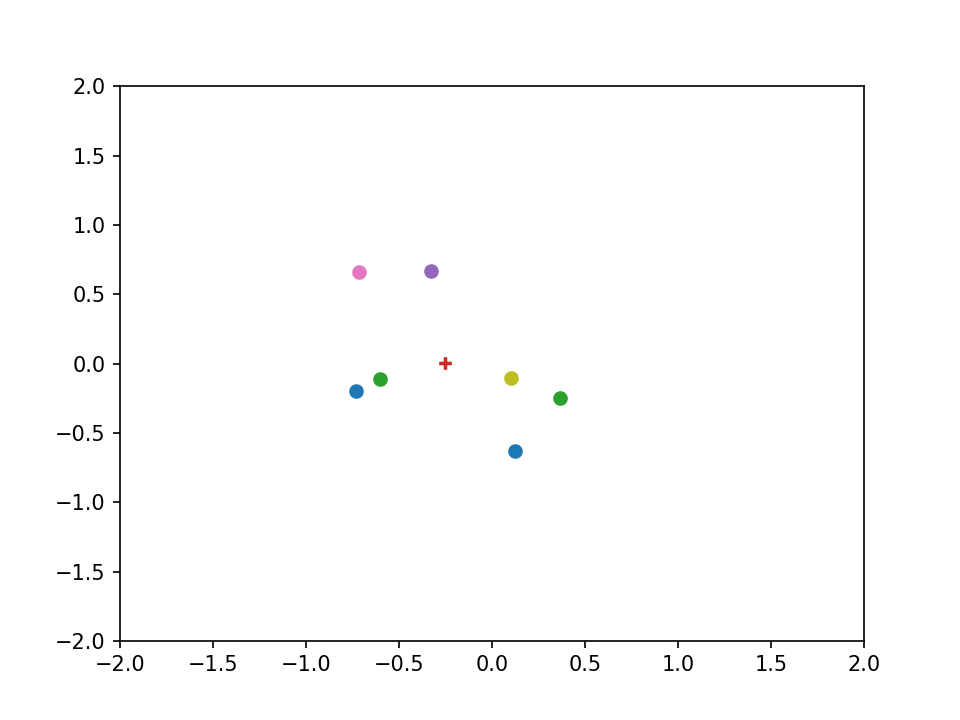

<IPython.core.display.Javascript object>


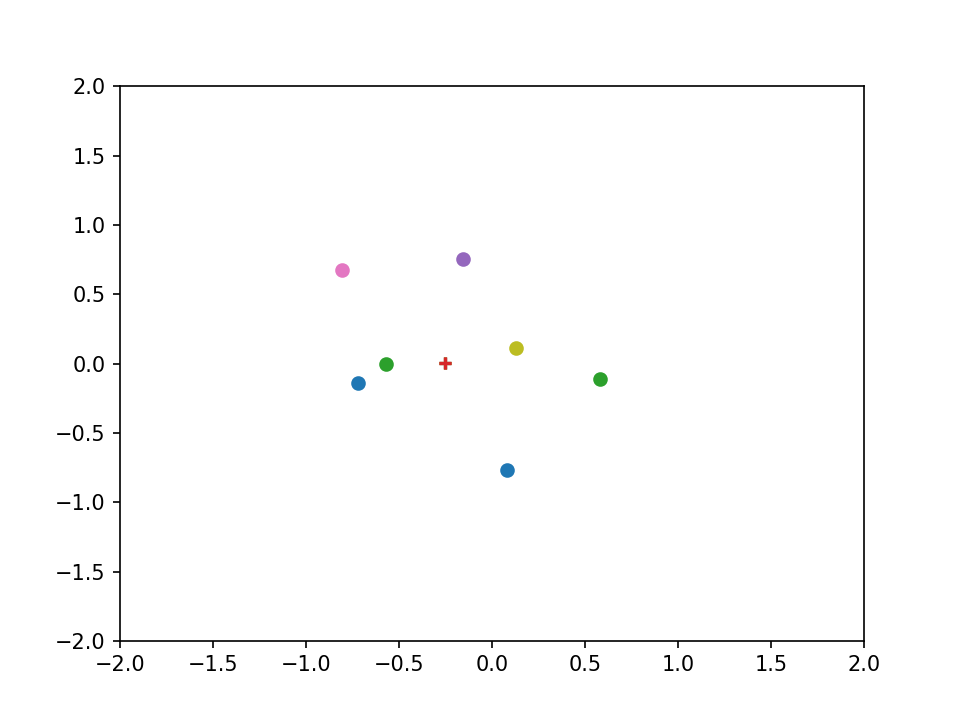

<IPython.core.display.Javascript object>


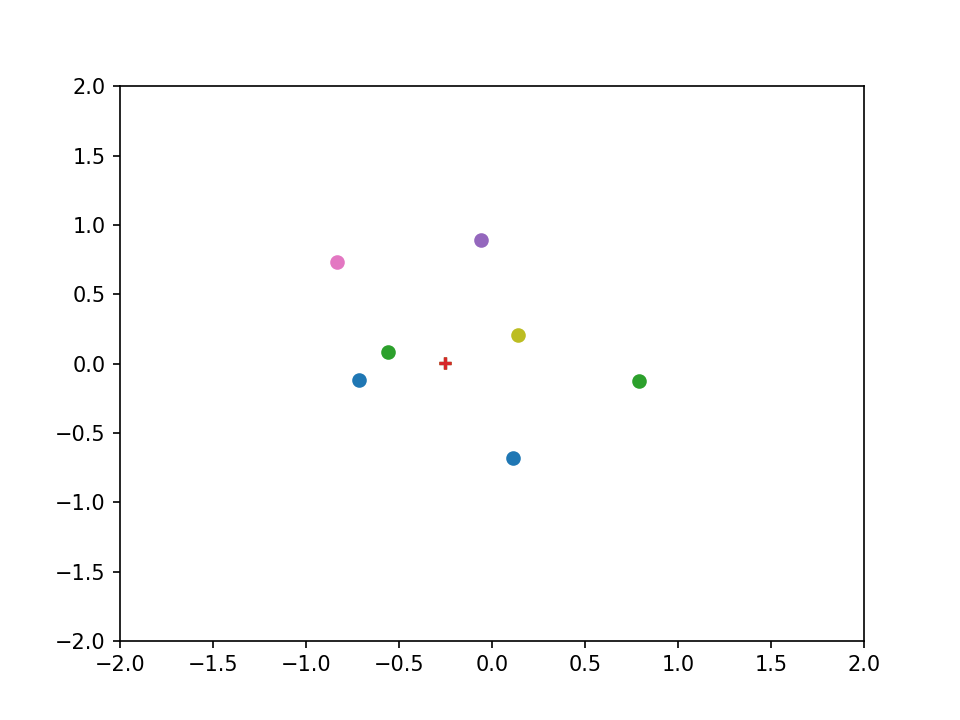

<IPython.core.display.Javascript object>


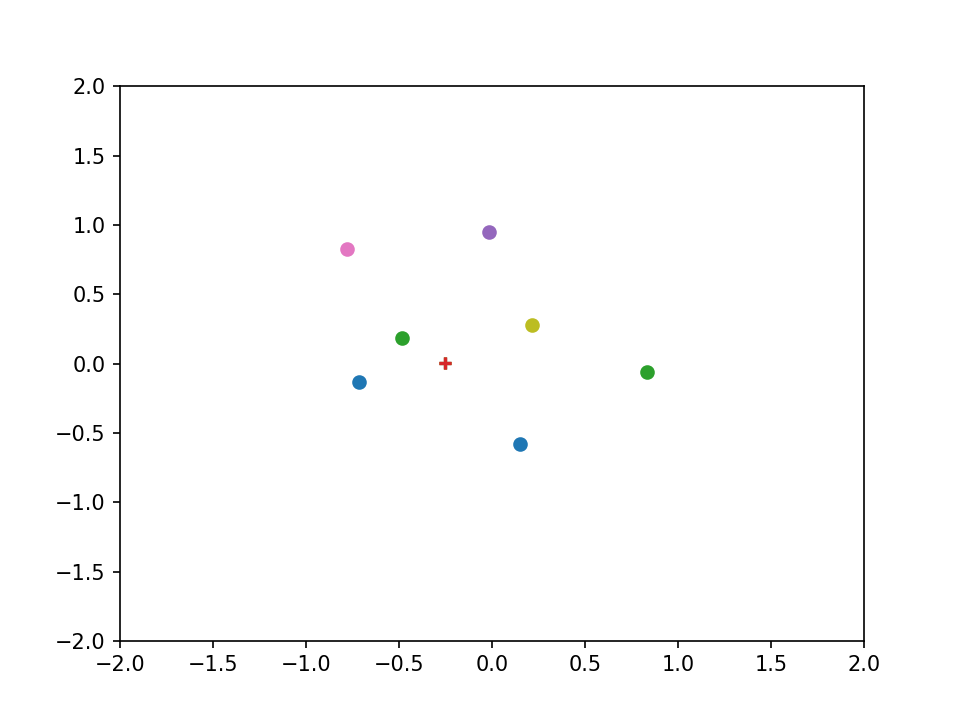

<IPython.core.display.Javascript object>


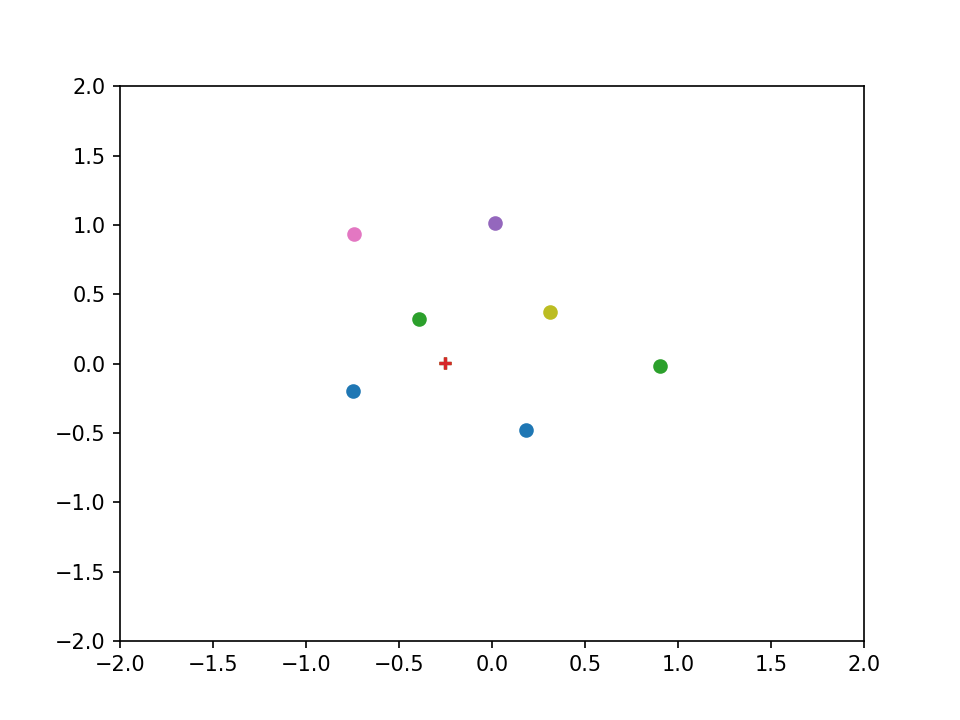

<IPython.core.display.Javascript object>


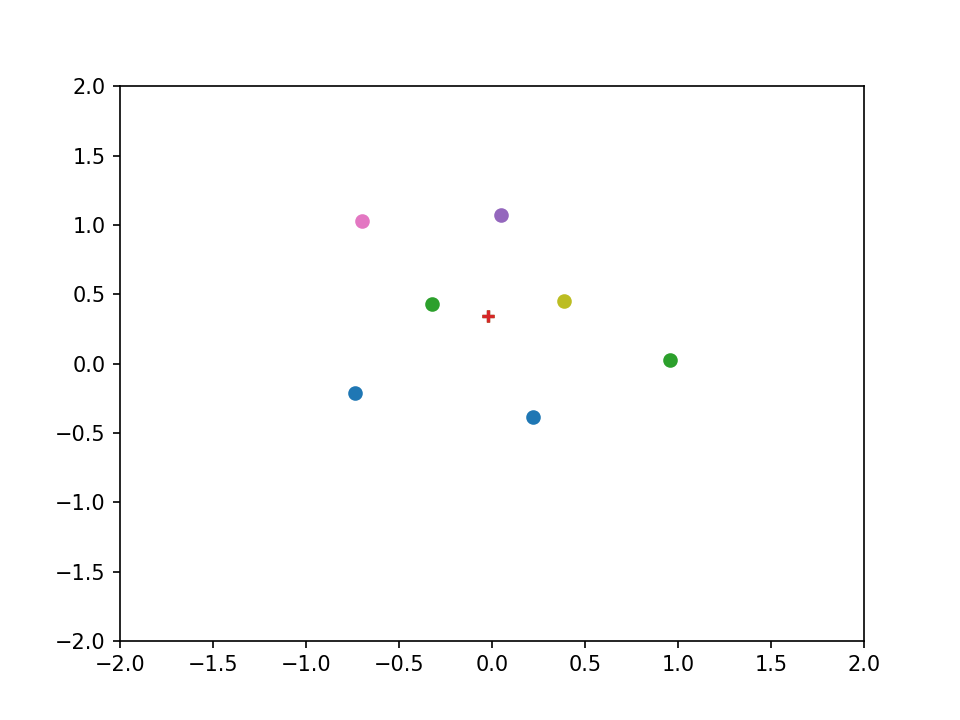

In [77]:
d_sep = .5
N = 2000
nbrob = 7
plot_lim = 2

γ = 1
γs = 0.1
γc = 0.01
γa = 1

def Simul2D(sys):
    Xs = np.ones((nbrob,4,N))
    Us = np.zeros((nbrob,2,N-1))
    Cs = np.zeros((2,N-1))
    Vs = np.zeros((2,N-1))

    for i in range(nbrob):
        Xs[i] = np.array([np.ones(N)*((np.random.rand()-0.5)*0.1), #x
                          np.ones(N)*((np.random.rand()-0.5)*0.1),
                          np.ones(N)*((np.random.rand()-0.5)*1.5), #x
                          np.ones(N)*((np.random.rand()-0.5)*1.5)]) #y
    
    for k in range(N-1):
        # Cohesion
        for j in range(nbrob):
            Cs[:,k] += Xs[j,2:,k]/nbrob
            
        # Alignment
        for j in range(nbrob):
            Vs[:,k] += Xs[j,0:2,k]/nbrob
            
        for i in range(nbrob):
            # Separation
            for j in range(nbrob):
                if i == j:
                    continue
                if ((Xs[i,2,k]-Xs[j,2,k])**2 + (Xs[i,3,k]-Xs[j,3,k])**2) < d_sep:
                    Us[i,:,k] += γs*(Xs[i,2:,k] - Xs[j,2:,k])
                
            Us[i,:,k] += γc*(Cs[:,k] - Xs[i,2:,k])
            
            Us[i,:,k] += γa*(Vs[:,k])
            
            Xs[i,:,k+1] = sys(Xs[i,:,k],γ*Us[i,:,k]).T
    
    plt.figure()
    for i in range(nbrob):
        plt.scatter(Xs[i,2,:],Xs[i,3,:])
    plt.scatter(Cs[0,:],Cs[1,:],marker='+')
    plt.xlim([-plot_lim, plot_lim])
    plt.ylim([-plot_lim, plot_lim])
    plt.show()
    
    plt.figure()
    plt.title("Speed")
    plt.scatter(Vs[0,:],Vs[1,:])
    plt.show()
    
    plt.figure()
    plt.title("Center")
    plt.scatter(Cs[0,:],Cs[1,:])
    plt.show()
    
    for k in range(0,N,int(N/5)):
        plt.figure()
        for i in range(nbrob):
            plt.scatter(Xs[i,2,k],Xs[i,3,k])
            plt.scatter(Cs[0,i],Cs[1,i],marker='+')
        plt.xlim([-plot_lim, plot_lim])
        plt.ylim([-plot_lim, plot_lim])
    plt.figure()
    for i in range(nbrob):
        plt.scatter(Xs[i,2,-1],Xs[i,3,-1])
        plt.scatter(Cs[0,-1],Cs[1,-1],marker='+')
    plt.xlim([-plot_lim, plot_lim])
    plt.ylim([-plot_lim, plot_lim])
    plt.show()

Simul2D(DroneSys)

In [8]:
np.zeros(2)

array([0., 0.])